In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
try:
    import Image
except ImportError:
    from PIL import Image

import PIL
import os 


In [3]:
path = "/data/malio/softsys/imgs_data"
names = [path for path in os.listdir(path) if path.endswith('.png')]
print(len(names))

115


In [4]:
def normalize(img):
    img = np.array(img)
    img = img - img.min()
    img = img / img.max()
    return img

In [5]:
def standardize(img):
    img = np.array(img)
    img = (img - img.mean()) / img.std()
    return img

In [6]:
def sobel(img, ksize=3):
    img = np.array(img)
    sobelx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=ksize)
    sobely = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=ksize)
    magnitude = cv2.magnitude(sobelx, sobely)
    magnitude = cv2.convertScaleAbs(magnitude)
    return magnitude

Data distribution

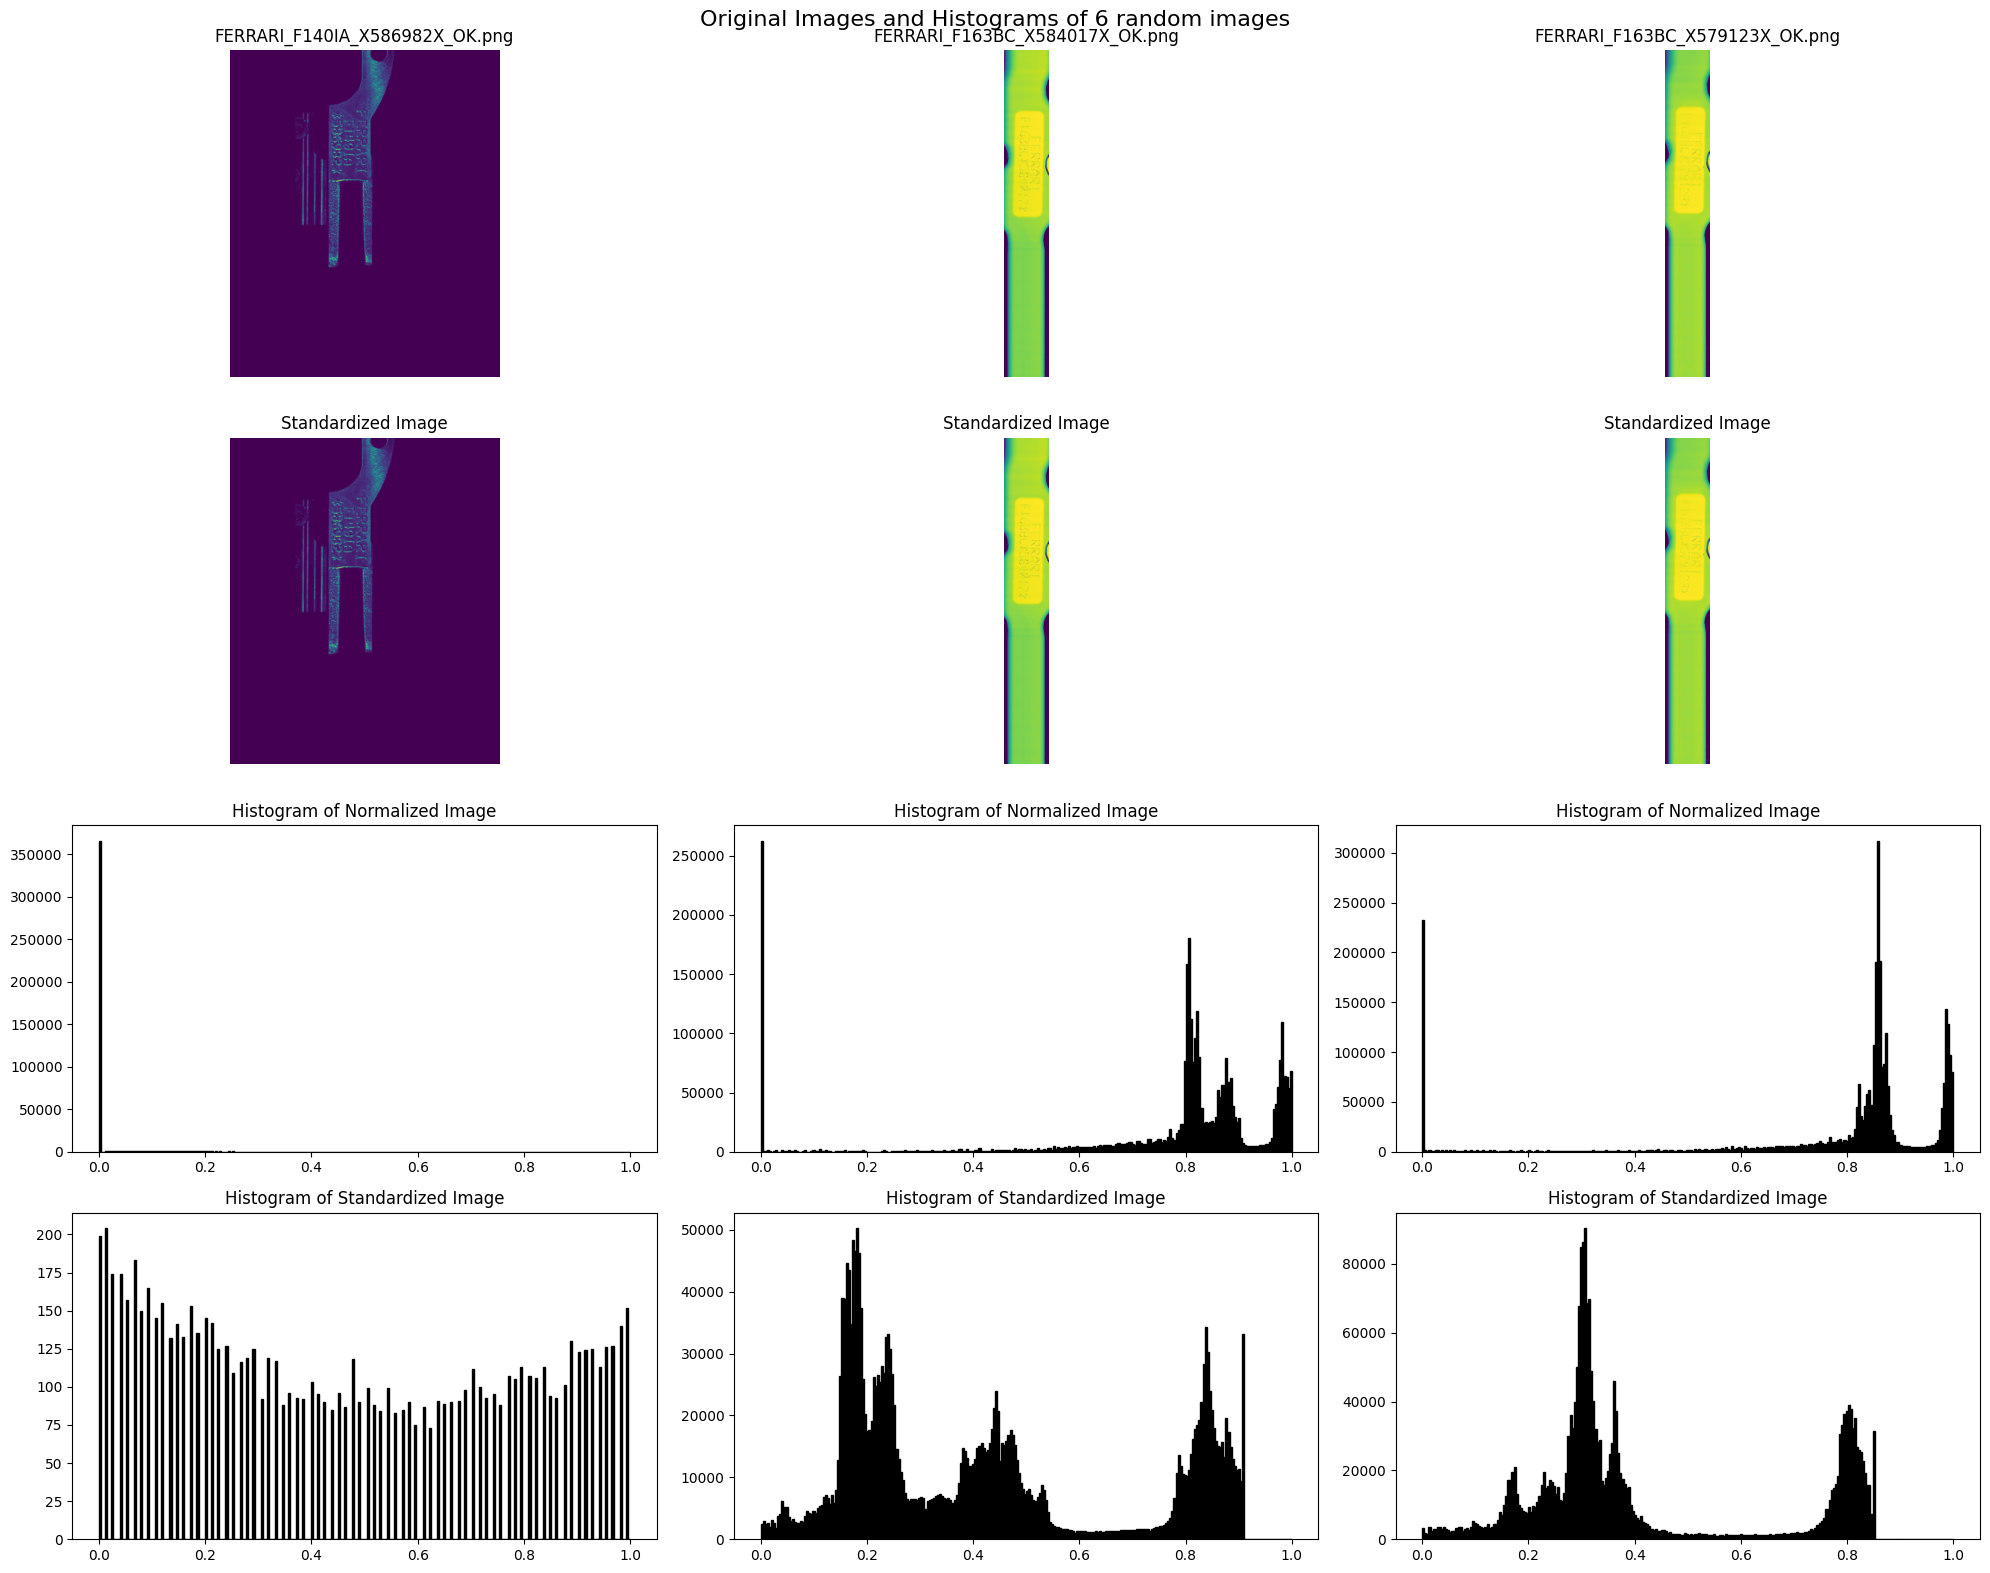

In [7]:
fig, axes = plt.subplots(4, 3, figsize=(20, 16))
img_idx = np.random.randint(0, len(names), 3)
for i in range(3):
    img = Image.open(os.path.join(path, names[img_idx[i]]))
    norm_img = normalize(img)
    stand_img = standardize(img)
    
    # Plot original image
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'{names[img_idx[i]]}')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(stand_img)
    axes[1, i].set_title(f'Standardized Image')
    axes[1, i].axis('off')
    
    # Plot histogram
    axes[2, i].hist(norm_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
    axes[2, i].set_title(f'Histogram of Normalized Image')
    axes[3, i].hist(stand_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
    axes[3, i].set_title(f'Histogram of Standardized Image')

plt.suptitle("Original Images and Histograms of 6 random images", fontsize=16)
plt.tight_layout()
plt.show()

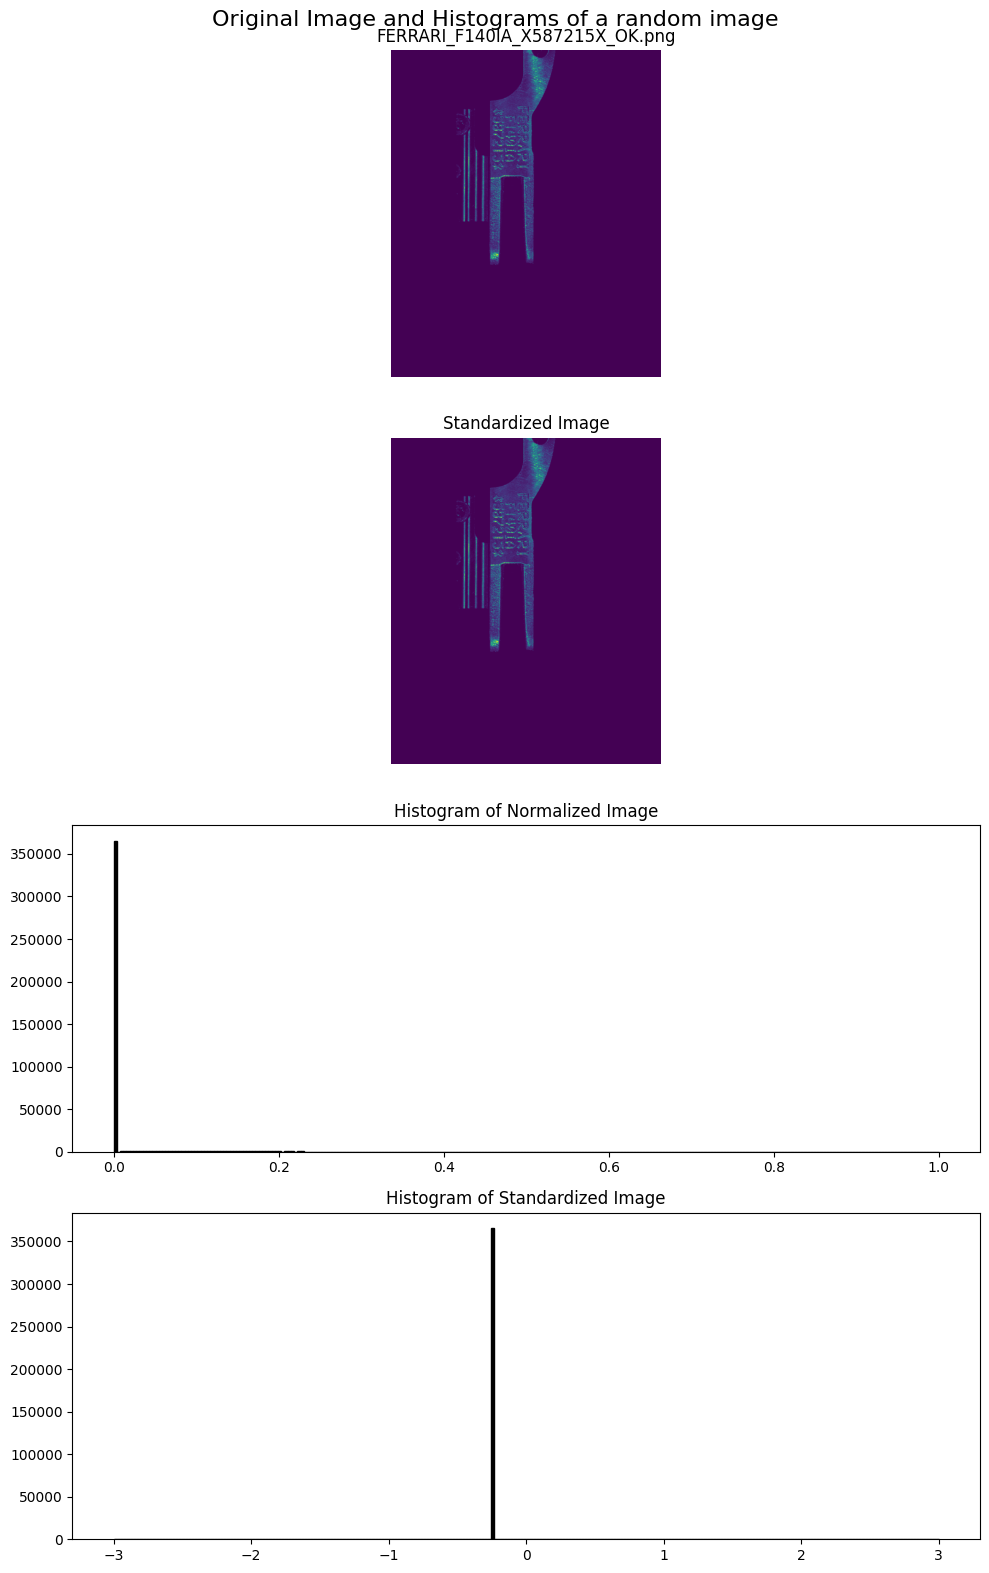

In [8]:
fig, axes = plt.subplots(4, 1, figsize=(10, 16))
img_idx = np.random.randint(0, len(names))
img = Image.open(os.path.join(path, names[img_idx]))
norm_img = normalize(img)
stand_img = standardize(img)

# Plot original image
axes[0].imshow(img)
axes[0].set_title(f'{names[img_idx]}')
axes[0].axis('off')

# Plot standardized image
axes[1].imshow(stand_img)
axes[1].set_title(f'Standardized Image')
axes[1].axis('off')

# Plot histogram of normalized image
axes[2].hist(norm_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
axes[2].set_title(f'Histogram of Normalized Image')

# Plot histogram of standardized image
axes[3].hist(stand_img.ravel(), bins=256, range=(-3.0, 3.0), fc='k', ec='k')
axes[3].set_title(f'Histogram of Standardized Image')

plt.suptitle("Original Image and Histograms of a random image", fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
def box_detector(img, edge_op):
    img = np.array(img)
    edge = edge_op(img)

    thresh = cv2.adaptiveThreshold(
        src=edge,
        maxValue=1,
        adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        thresholdType=cv2.THRESH_BINARY,
        blockSize=5,
        C=2)

    thresh_color = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
    # apply some dilation and erosion to join the gaps - change iteration to detect more or less area's
    thresh = cv2.dilate(thresh,None,iterations =1)
    thresh = cv2.erode(thresh,None,iterations =1)
    
    # Find the contours
    contours,hierarchy = cv2.findContours(thresh,
                                        cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)
    
    # For each contour, find the bounding rectangle and draw it
    print(f"contours found: {len(contours)}")
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area >33000:
            x,y,w,h = cv2.boundingRect(cnt)
            cv2.rectangle(img,
                        (x,y),(x+w,y+h),
                        (0,255,0),
                        5)
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

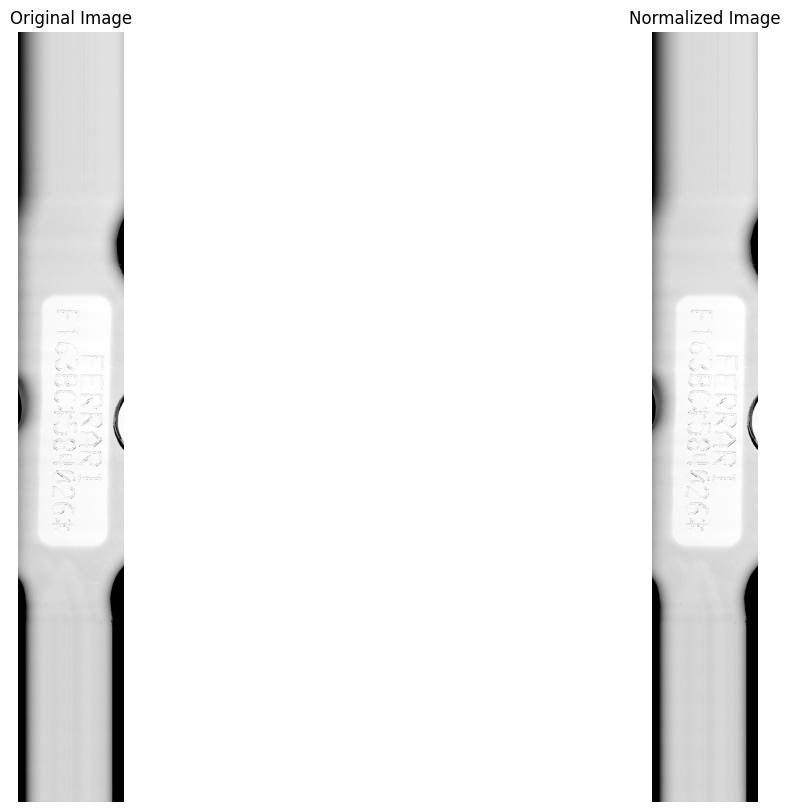

Image: FERRARI_F163BC_X584026X_OK.png
Min: 0, Max: 3402
Shape: (4800, 660), Dtype: uint16
Unique values count: 3402
Normalized - Min: 0.0, Max: 1.0


In [10]:
rnd_idx = np.random.randint(0, len(names))
img = Image.open(os.path.join(path, names[rnd_idx]))
img = np.array(img)
norm_img = (img - img.min()) / (img.max() - img.min())

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(norm_img, cmap='gray')
axes[1].set_title('Normalized Image')
axes[1].axis('off')
plt.show()

print(f'Image: {names[rnd_idx]}')
print(f'Min: {img.min()}, Max: {img.max()}')
print(f'Shape: {img.shape}, Dtype: {img.dtype}')
# print(f'Unique values: {np.unique(img)}')
print(f'Unique values count: {len(np.unique(img))}')

print(f"Normalized - Min: {norm_img.min()}, Max: {norm_img.max()}")


contours found: 7735


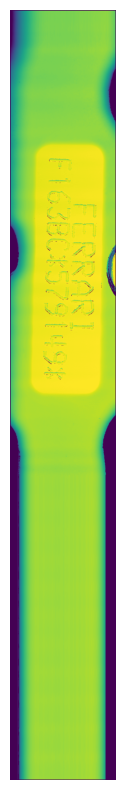

In [11]:
img = Image.open(os.path.join(path, names[0]))

box_detector(img, sobel)


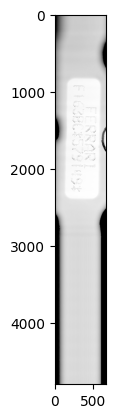

In [12]:
img = Image.open(os.path.join(path, names[0]))
img = np.array(img)
img = normalize(img)
plt.imshow(img, cmap='gray')

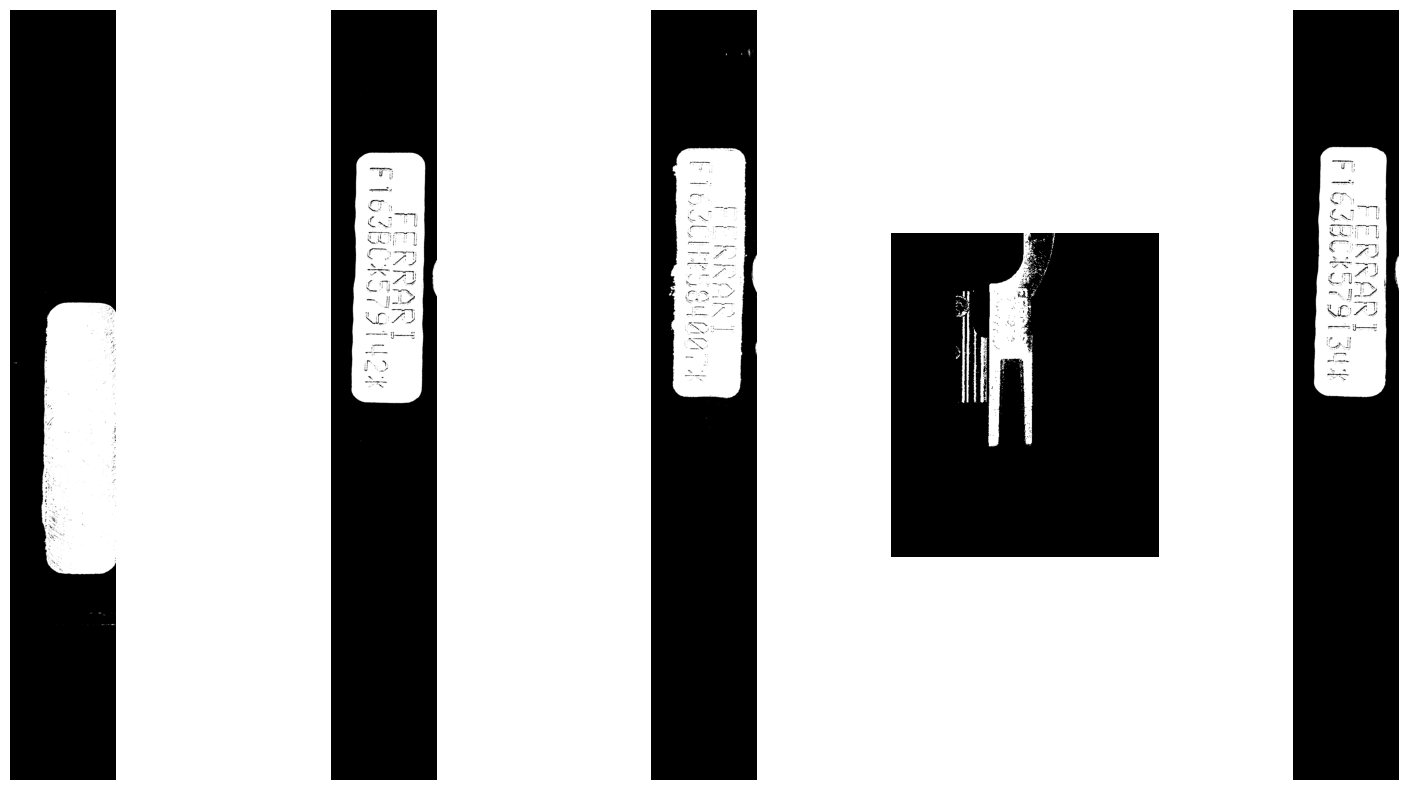

In [13]:
idx = np.random.randint(0, len(names), 5)
t_imgs = []
for i in idx:
    img = Image.open(os.path.join(path, names[i]))
    img = np.array(img)
    img = normalize(img)
    img = standardize(img)
    t_img = cv2.threshold(img, 0.6, 1, cv2.THRESH_BINARY)
    t_imgs.append(t_img[1])

fig, axes = plt.subplots(1, len(t_imgs), figsize=(20, 10))
for i, img in enumerate(t_imgs):
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
plt.show()

In [14]:
def crop_largest_white_object(image):
    image = (image * 255).astype(np.uint8)
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No white objects found in the image.")
        return None
    largest_contour = max(contours, key=cv2.contourArea)

    x, y, w, h = cv2.boundingRect(largest_contour)

    cropped_image = image[y:y+h, x:x+w]
    coordinates = (x, y, w, h)
    return cropped_image, coordinates

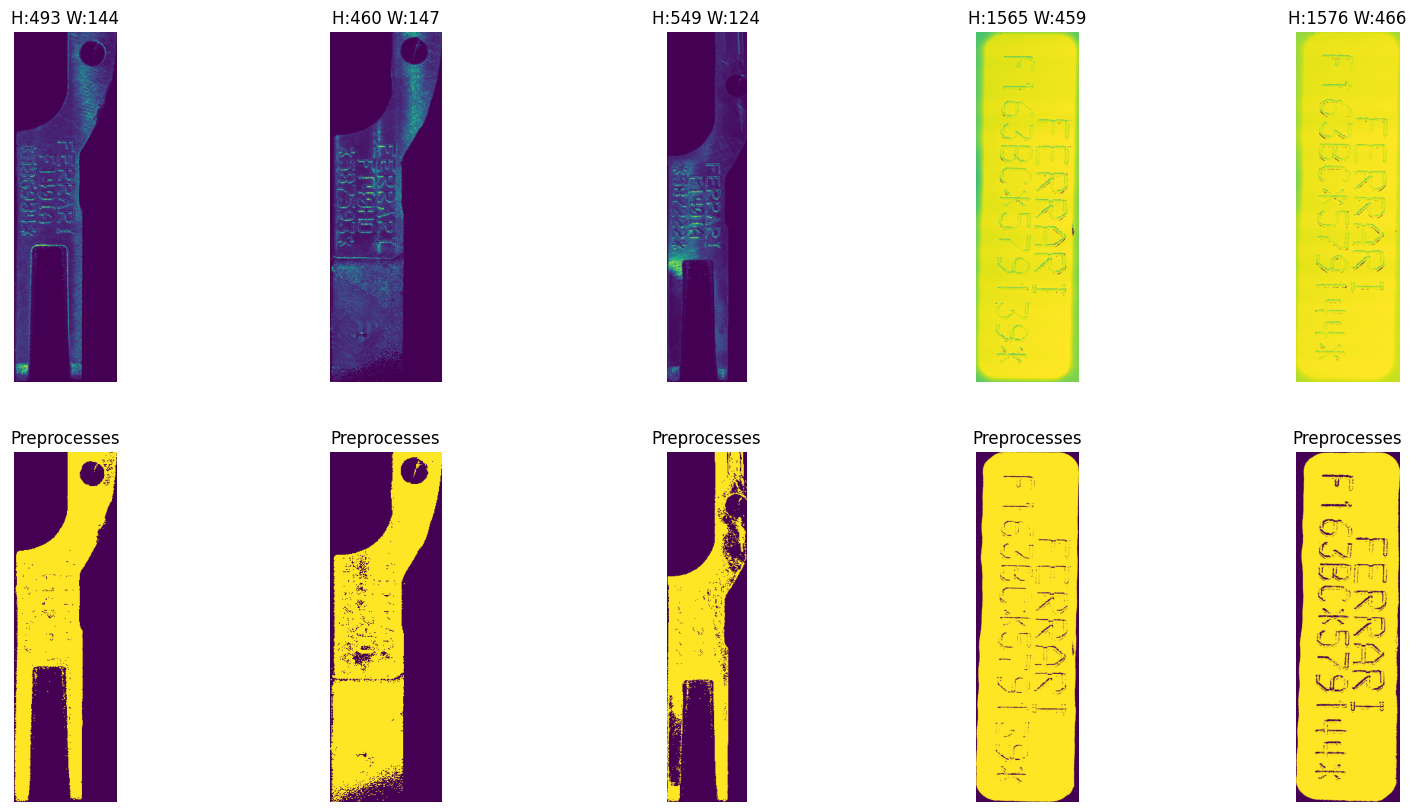

In [15]:
idx = np.random.randint(0, len(names), 5)
cropped_imgs = []
coords = []
imgs = []
for i in idx:
    img = Image.open(os.path.join(path, names[i]))
    img = np.array(img)
    img = normalize(img)
    img = standardize(img)
    t_img = cv2.threshold(img, 0.6, 1, cv2.THRESH_BINARY)[1]

    cropped_img, coordinates = crop_largest_white_object(t_img)
    cropped_imgs.append(cropped_img)
    coords.append(coordinates)
    imgs.append(img)

fig, axes = plt.subplots(2, len(cropped_imgs), figsize=(20, 10))
for i, img in enumerate(cropped_imgs):
    x, y, w, h = coords[i]
    axes[0, i].imshow(imgs[i][y:y+h, x:x+w])
    axes[0, i].set_title(f'H:{h} W:{w}')
    axes[0, i].axis('off')
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Preprocesses')
    axes[1, i].axis('off')
plt.show()

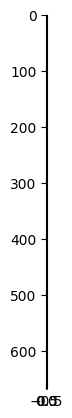

In [19]:
inv_img = cv2.bitwise_not(t_img[1])
plt.imshow(inv_img, cmap='gray')

In [16]:
from torch import nn

In [27]:
m = nn.AdaptiveAvgPool2d(1)


In [29]:
rand_img = torch.randn(1, 64, 128, 256)

In [28]:
out = m(torch.Tensor(cropped_imgs[0]).unsqueeze(0))
out.shape

torch.Size([1, 1, 1])

In [30]:
rnd_out = m(rand_img)
rnd_out.shape

torch.Size([1, 64, 1, 1])